In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.metrics import silhouette_score
import plotly.express as px
from scipy.cluster.hierarchy import linkage, dendrogram
import random
from sklearn.metrics import silhouette_samples
import seaborn as sns

In [2]:
%store -r data

In [3]:
#kernel dies if the full dataset is used

data = data.sample(n = 10000)
X = data.drop(' shares', axis = 1)
Y = data[' shares']

In [4]:
X_sampled = X
%store X_sampled

Stored 'X_sampled' (DataFrame)


In [5]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [6]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_normalized)
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['C1', 'C2']
X_pca

,C1,C2
0,-0.088567,-0.051428
1,-0.053404,-0.146115
2,-0.141556,-0.155017
3,-0.086488,0.307461
4,-0.021010,-0.131861
...,...,...
9995,-0.051611,0.268996
9996,-0.081050,0.122197
9997,-0.052710,0.059538
9998,-0.140837,-0.013981


In [7]:
linkages = ['average', 'ward', 'complete', 'single']
metrics = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
best_model = None
max_score = float('-inf')

In [8]:
for lnkg in linkages:
    for metric in metrics:
        if lnkg == 'ward' and metric != 'euclidean':
            continue
        agglomerative_model = AgglomerativeClustering(n_clusters = 2, linkage = lnkg, metric = metric)
        agglomerative_model.fit(X)

        score = silhouette_score(X, agglomerative_model.labels_)
        if score > max_score:
            max_score = score
            best_model = agglomerative_model

In [9]:
print(best_model)

AgglomerativeClustering(metric='euclidean')


<AxesSubplot:xlabel='C1', ylabel='C2'>

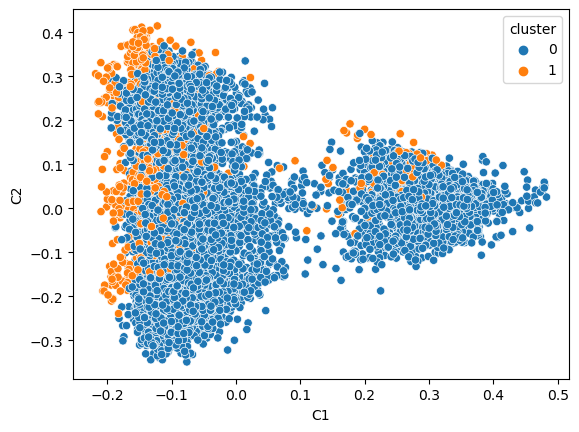

In [10]:
X_pca['cluster'] = pd.Categorical(best_model.labels_)
sns.scatterplot(x = "C1", y = "C2", hue = "cluster", data = X_pca)

In [15]:
silhouette_values = silhouette_samples(X, best_model.labels_)
print(silhouette_values)
score = silhouette_score(X, best_model.labels_)
print(score)

[0.85188199 0.78240913 0.69638244 ... 0.85272028 0.83198836 0.80438329]
0.7914132967687967


In [12]:
lnk = linkage(X, method = best_model.linkage)

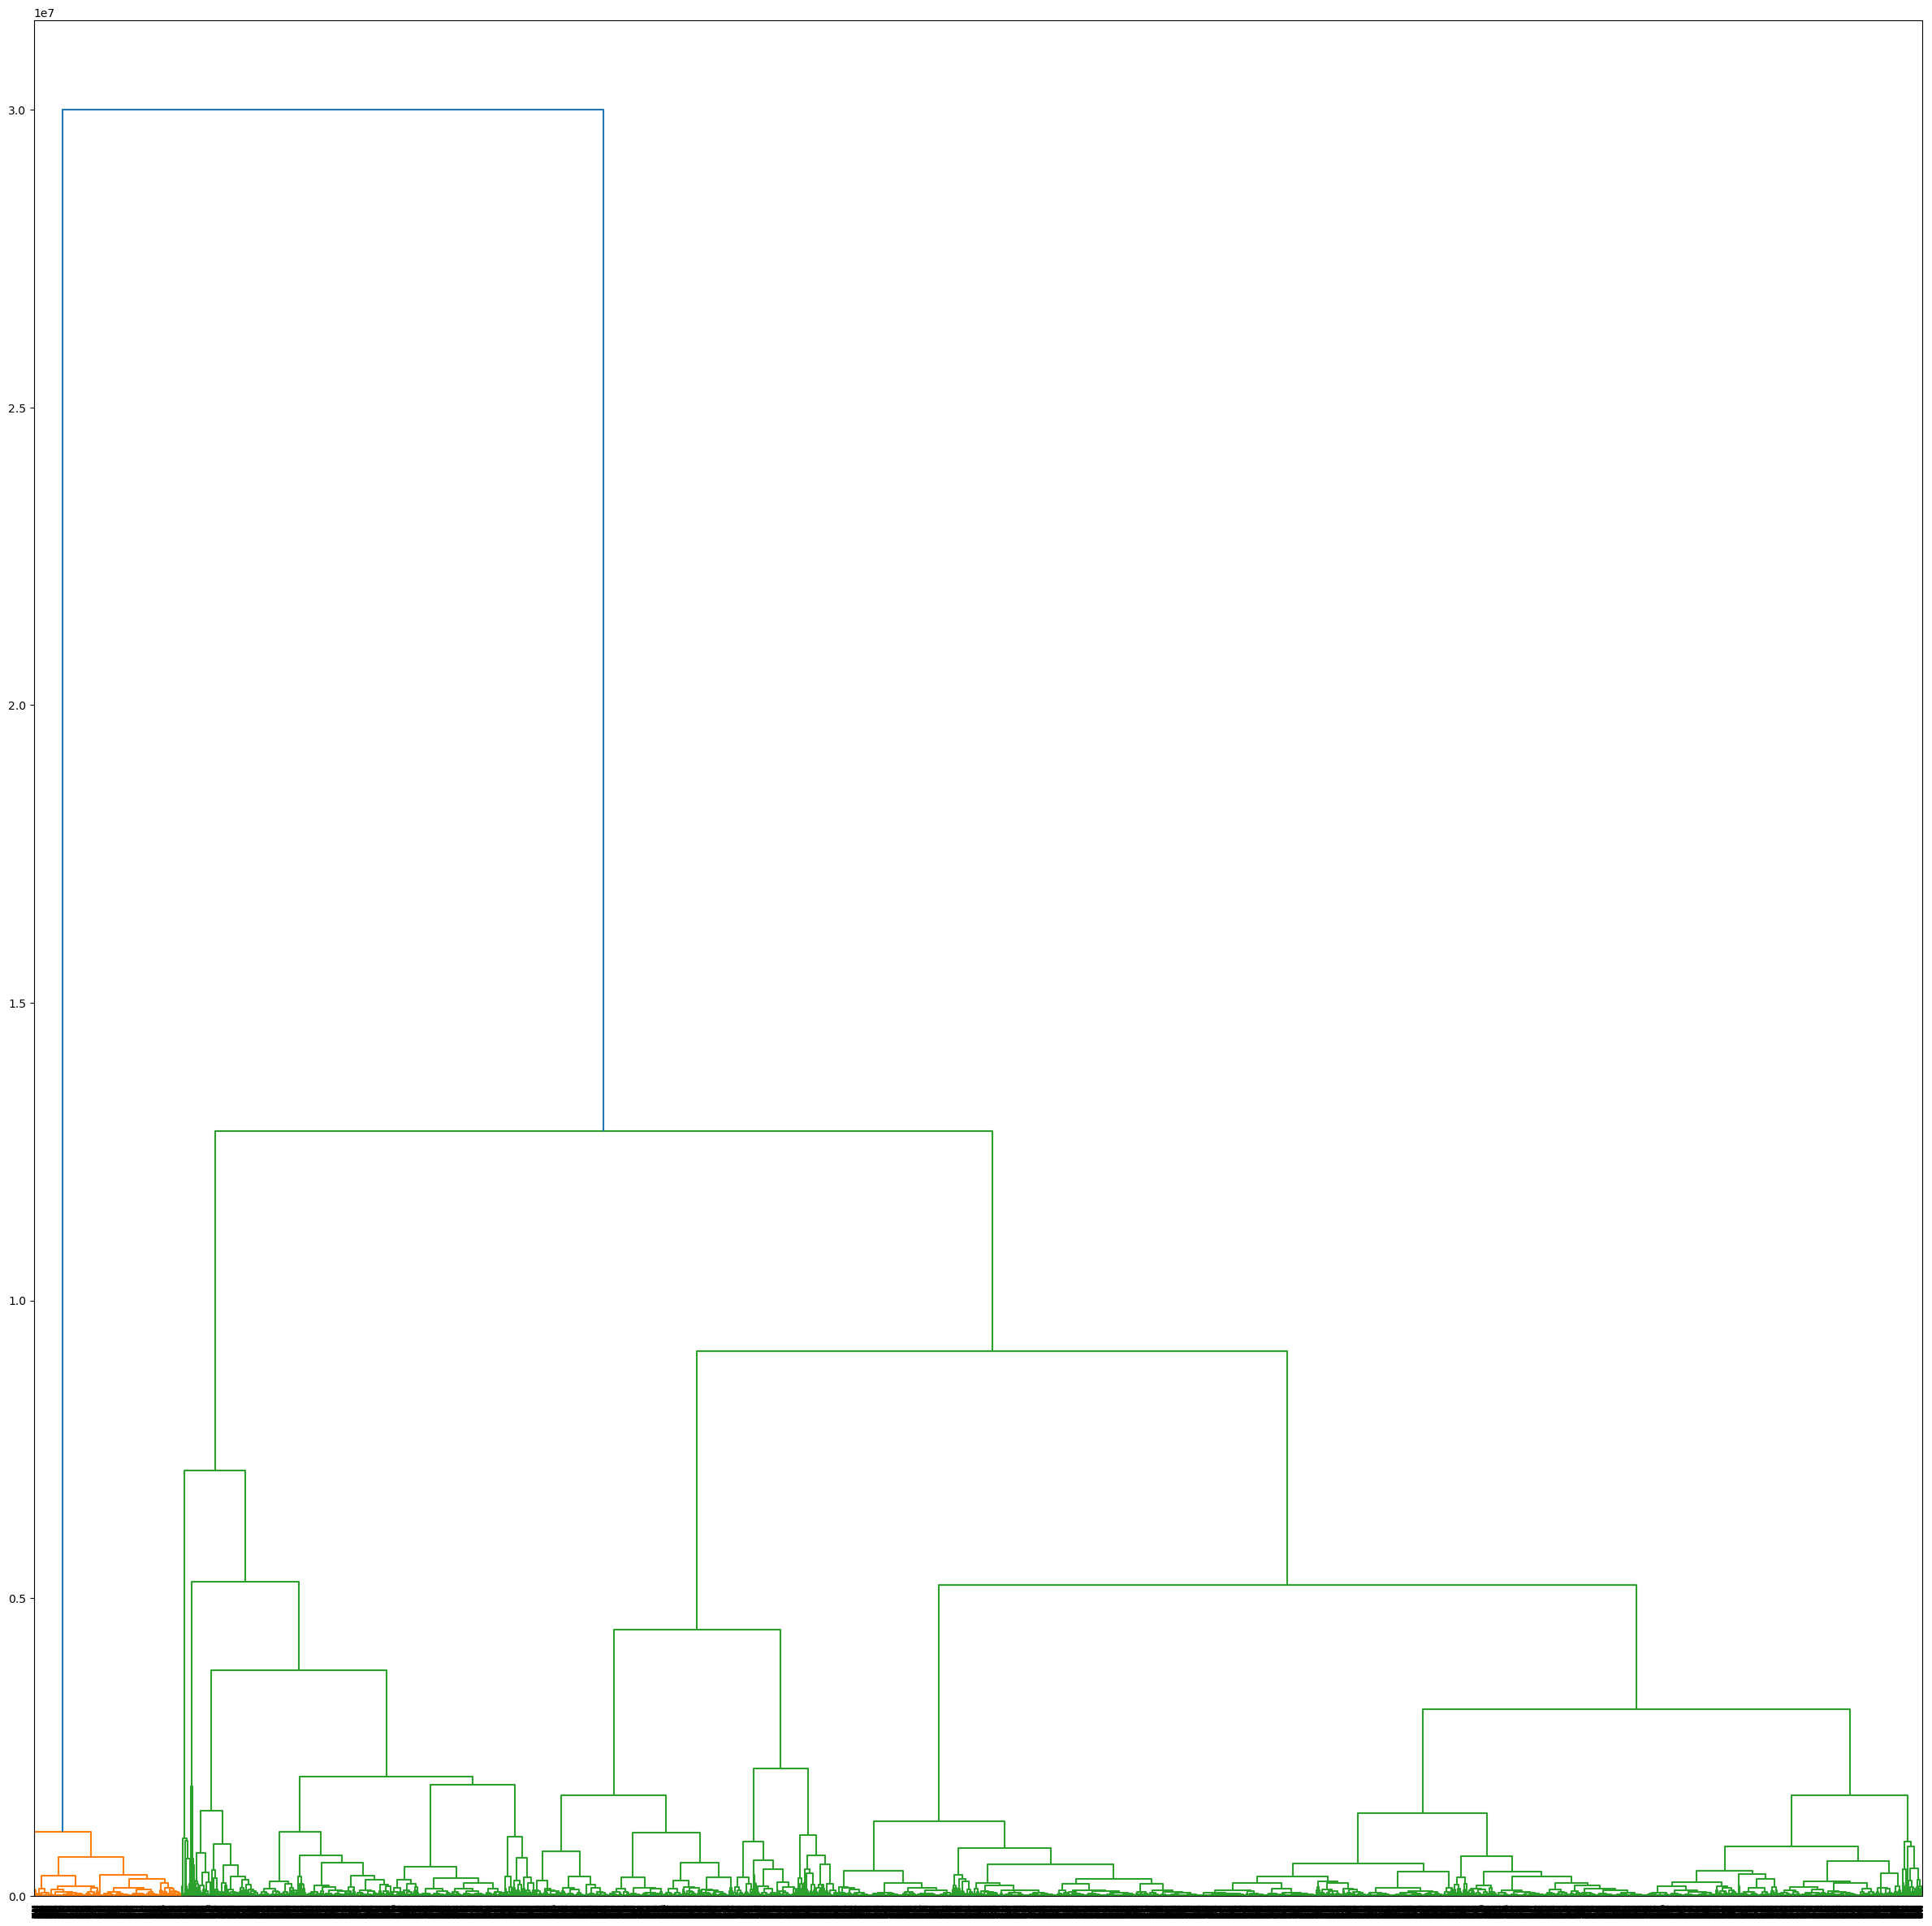

In [13]:
fig = plt.figure(figsize=(30,30))
_ = dendrogram(lnk)

In [14]:
agglomerative = best_model
%store agglomerative

Stored 'agglomerative' (AgglomerativeClustering)
